In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [24]:
df = pd.read_csv('Book1.csv')

In [25]:
df

,Month,Small,Big,Total
0,2022-01-01,6990,5112,12102
1,2022-02-01,26108,25502,51610
2,2022-03-01,11869,6121,17990
3,2022-04-01,9504,6283,15787
4,2022-05-01,11178,9287,20465
5,2022-06-01,13902,8165,22067
6,2022-07-01,10530,5904,16434
7,2022-08-01,14919,9436,24355
8,2022-09-01,9123,11570,20693
9,2022-10-01,10222,7674,17896


In [26]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m-%d')

In [27]:
df

,Month,Small,Big,Total
0,2022-01-01,6990,5112,12102
1,2022-02-01,26108,25502,51610
2,2022-03-01,11869,6121,17990
3,2022-04-01,9504,6283,15787
4,2022-05-01,11178,9287,20465
5,2022-06-01,13902,8165,22067
6,2022-07-01,10530,5904,16434
7,2022-08-01,14919,9436,24355
8,2022-09-01,9123,11570,20693
9,2022-10-01,10222,7674,17896


In [28]:
df.rename(columns= {'Month': 'ds', 'Total': 'y'},inplace=True)

In [29]:
df

,ds,Small,Big,y
0,2022-01-01,6990,5112,12102
1,2022-02-01,26108,25502,51610
2,2022-03-01,11869,6121,17990
3,2022-04-01,9504,6283,15787
4,2022-05-01,11178,9287,20465
5,2022-06-01,13902,8165,22067
6,2022-07-01,10530,5904,16434
7,2022-08-01,14919,9436,24355
8,2022-09-01,9123,11570,20693
9,2022-10-01,10222,7674,17896


In [30]:
model = Prophet()
model.fit(df)

12:44:21 - cmdstanpy - INFO - Chain [1] start processing
12:44:22 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
future_dates = model.make_future_dataframe(periods=3, freq='M')

C:\Users\admin\anaconda3.1\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


In [32]:
forecast = model.predict(future_dates)

C:\Users\admin\anaconda3.1\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\admin\anaconda3.1\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


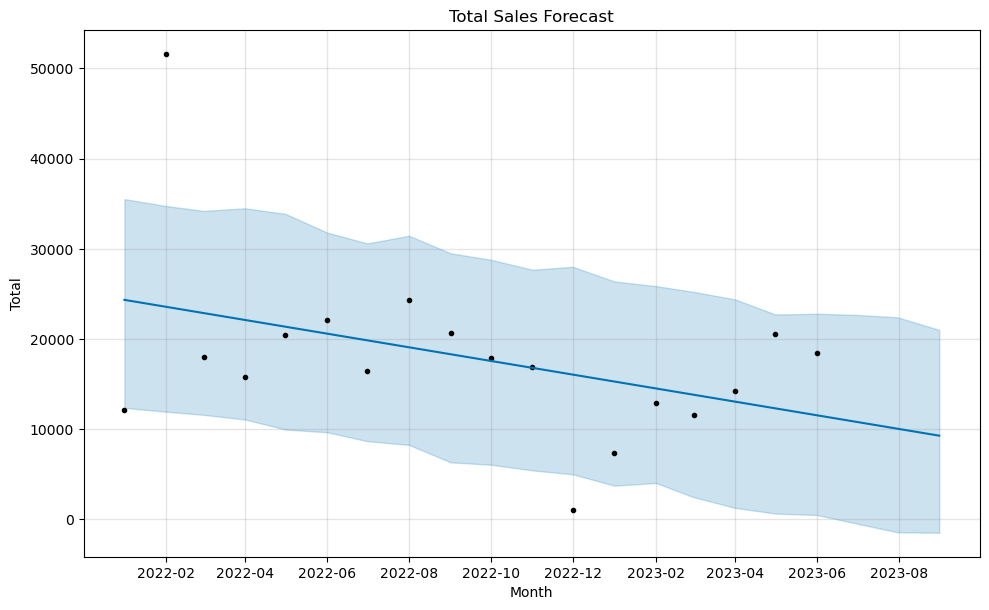

In [34]:
model.plot(forecast)
plt.xlabel('Month')
plt.ylabel('Total')
plt.title('Total Sales Forecast')
plt.show()

In [42]:
forecast_values = forecast[['ds', 'yhat']].tail(4)

In [43]:
print("Forecasts: ")
print(forecast_values)

Forecasts: 
           ds          yhat
17 2023-06-01  11514.397413
18 2023-06-30  10794.469217
19 2023-07-31  10024.890800
20 2023-08-31   9255.312384
